In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.cli_kaggle import get_kagglke_data
plt.style.use('classic')

In [2]:
# get_kagglke_data("mirichoi0218/insurance", "./data/")
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<a href=https://www.kaggle.com/datasets/mirichoi0218/insurance>Medical Cost Personal Datasets</a> <br>
Column descriptions:
- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight ($kg / m ^ 2$) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

Assume that we observe only non-smoking women. <br>
We only know their age and insurance charges. <br>
We asked to calculate insurance cost for not smoking women at age 30. <p>
*The baseline supposion*: there is a fixed cost of insurance and personal coefficient of age, i.e. <br>
$\widehat{\text{Charge}} = \widehat{\text{Fixed Cost}} + \hat k \times \text{Age}$

Or in general: <br>
$\hat Y = \hat\beta_0 + \hat\beta_1 x_1 + ... + \hat\beta_n x_n = X\hat\beta$ <br>
*where:* <br>
$ 
X = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} & 1 \\
  x_{2,1} & x_{2,2} & \cdots & a_{2,n} & 1  \\
  \vdots  & \vdots  & \ddots & \vdots & \vdots  \\
  x_{m,1} & x_{m,2} & \cdots & x_{m,n} & 1 
 \end{pmatrix},
\hat\beta = \begin{pmatrix}
    \hat\beta_1 \\
    \vdots  \\
    \hat\beta_n \\
    \hat\beta_0
\end{pmatrix}$

In [16]:
female_not_smokers_sample = df.query("sex=='female' and smoker=='no'").sample(25)
fnss = female_not_smokers_sample.copy()

In [17]:
x1 = fnss.age.to_numpy()
x2 = np.ones(shape=len(x1))
X = np.array([x1, x2]).T
y = fnss.charges.to_numpy()

# I suppose beta_0 is -4500 and beta_1 is 300
weights = np.array([300, -4500])
# Use formula above
y_pred = X@weights

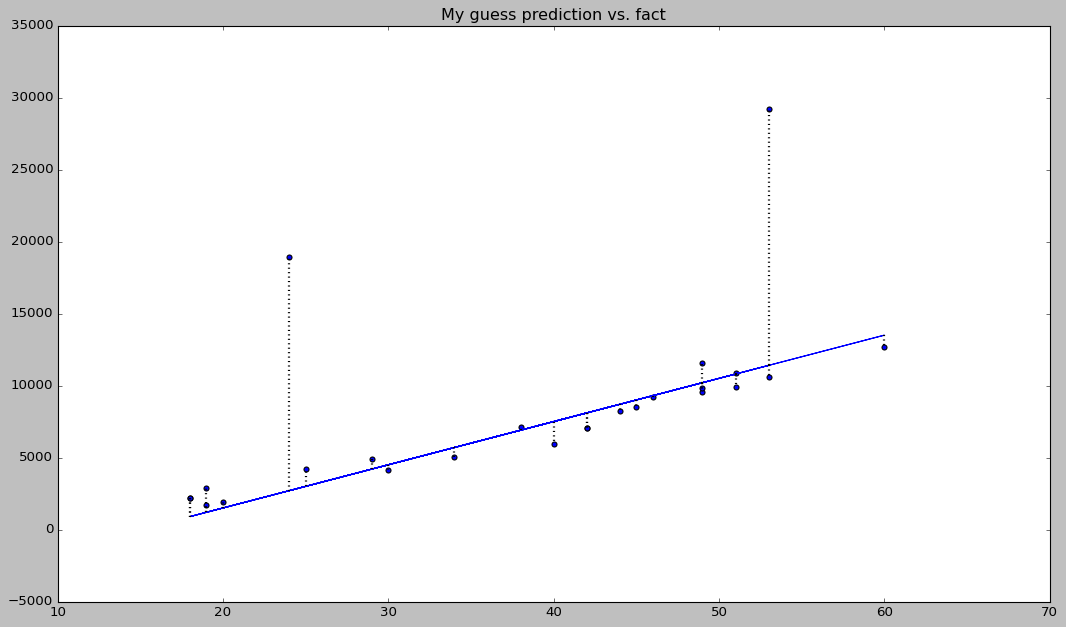

In [18]:
plt.figure(figsize=(16, 9))
plt.title('My guess prediction vs. fact')
plt.plot(x1, y_pred)
plt.scatter(x1, y)
for xi, yi, ypi in zip(x1, y, y_pred):
    plt.plot([xi, xi], [ypi, yi], linestyle=':', linewidth=2, color='black')
plt.show()

Seems like we've got a good enough prediction however that's not the best. <br>
To do better we have to minimize errors somehow. <br>
Firstly, there are two types of possible errors:
- Mean Absolute Error: $ MAE=\frac{1}{n} \displaystyle\sum_{i=1}^{n} |y_i-\hat y_i|=\frac{1}{n} \displaystyle\sum_{i=1}^{n} |e_i|$
- Mean Squared Error: $ MSE=\frac{1}{n} \displaystyle\sum_{i=1}^{n} (y_i-\hat y_i)^2=\frac{1}{n} \displaystyle\sum_{i=1}^{n} e_i^2 $

MAE is the same as *L1 norm* of erors vector devided by *n* and MSE is squared *L2 norm* devided by *n*:
- $MAE = \frac{1}{n}||e|| $
- $MSE = \frac{1}{n}||e||_2^2 $